In [8]:
import tensorflow as tf
import numpy as np
from keras import layers, models
from keras.datasets import reuters

In [9]:
# Conjunto de datos 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [12]:
train_data.shape

(8982,)

In [6]:
# Diccionario de palabras
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
    print(word_index.get(_ -3))

550378/550378 [==============================] - 0s 1us/step
None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [13]:
# vectorizar
def vectorizar(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

In [14]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [16]:
from keras.utils import to_categorical

In [17]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Construcción del modelo

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # softmax para clasificaciones multilayer

In [59]:
# Compilacion modelo
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
# set de valiaciones
x_val = x_train[:1000]
partial_x_val = x_train[1000:]

y_val = y_train[:1000]
partial_y_val = y_train[1000:]

In [61]:
# Entrenamiento del modelo

history = model.fit(partial_x_val, partial_y_val,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 16ms/step - loss: 2.6072 - accuracy: 0.4971 - val_loss: 1.7740 - val_accuracy: 0.6080
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.5176 - accuracy: 0.6771 - val_loss: 1.3764 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.1892 - accuracy: 0.7407 - val_loss: 1.2017 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9801 - accuracy: 0.7833 - val_loss: 1.0910 - val_accuracy: 0.7770
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8177 - accuracy: 0.8202 - val_loss: 1.0068 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6879 - accuracy: 0.8522 - val_loss: 0.9561 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5768 - accuracy: 0.8731 - val_loss: 0.9376 - val_accuracy: 0.7980
Epoch 8/20
16/16 [=

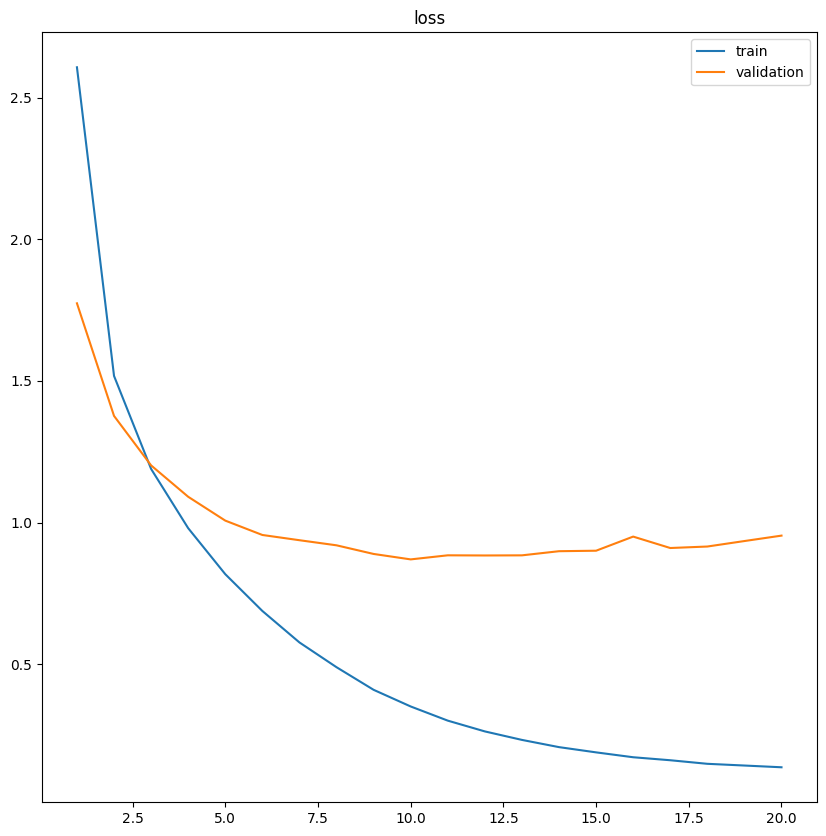

In [62]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1,len(loss_values)+1)

## Graficando los resultados
fig = plt.figure(figsize=(10,10))
plt.plot(epoch,loss_values, label='train')
plt.plot(epoch,val_loss_values, label='validation')
plt.title('loss')
plt.legend()
plt.show()

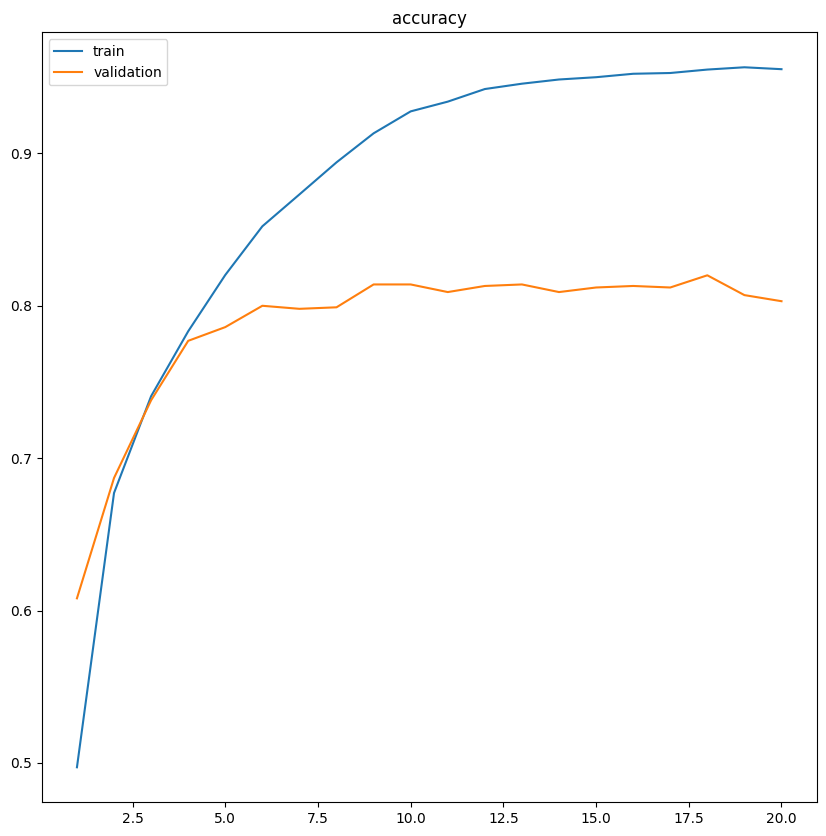

In [63]:
history_dict = history.history
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']

epoch = range(1,len(loss_values)+1)

## Graficando los resultados
fig = plt.figure(figsize=(10,10))
plt.plot(epoch,loss_values, label='train')
plt.plot(epoch,val_loss_values, label='validation')
plt.title('accuracy')
plt.legend()
plt.show()

In [64]:
# evaluacion del modelo
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 1ms/step - loss: 1.0552 - accuracy: 0.7894


[1.0551751852035522, 0.7894033789634705]

In [65]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 1ms/step


In [66]:
np.argmax(predictions[0])

3

# Aplicando las tecnincas para reducir overfitting

Menos neuronas en las capas ocultas

In [67]:
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax')) # softmax para clasificaciones multilayer

model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history2 = model2.fit(partial_x_val, partial_y_val,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 15ms/step - loss: 2.7899 - accuracy: 0.4875 - val_loss: 1.9257 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 1.6043 - accuracy: 0.6671 - val_loss: 1.4342 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.2269 - accuracy: 0.7241 - val_loss: 1.2319 - val_accuracy: 0.7260
Epoch 4/20
16/16 [==============================] - 0s 7ms/step - loss: 1.0036 - accuracy: 0.7762 - val_loss: 1.1124 - val_accuracy: 0.7390
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.8369 - accuracy: 0.8148 - val_loss: 1.0233 - val_accuracy: 0.7680
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.7010 - accuracy: 0.8474 - val_loss: 0.9847 - val_accuracy: 0.7820
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5860 - accuracy: 0.8752 - val_loss: 0.9081 - val_accuracy: 0.8070
Epoch 8/20
16/16 [=

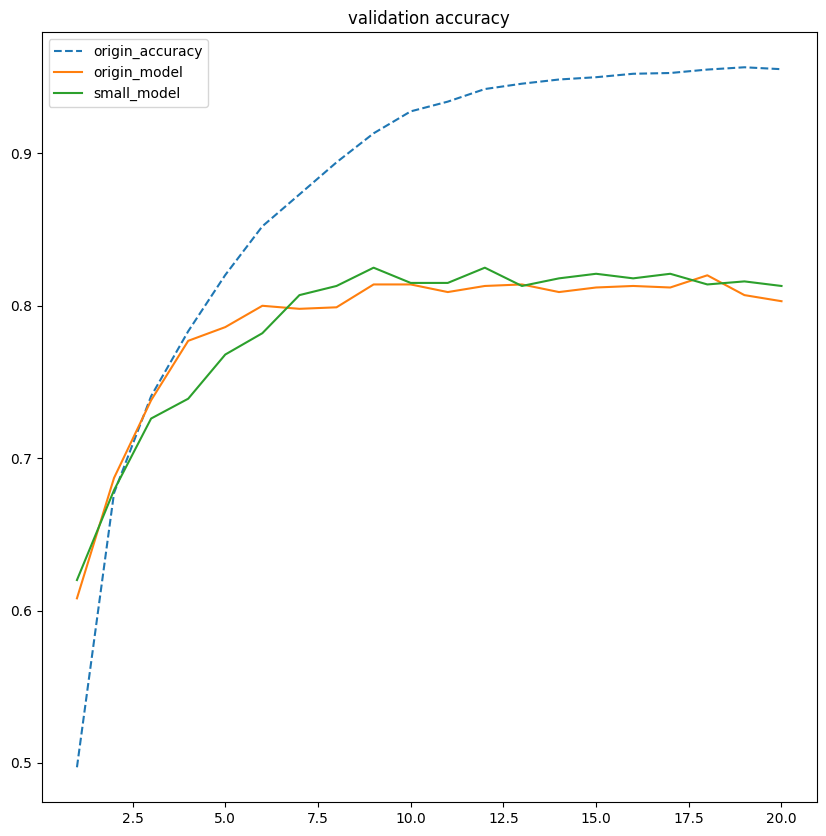

In [69]:
history_dict2 = history2.history
origin_acc = history_dict['accuracy']
origin = history_dict['val_accuracy']
small = history_dict2['val_accuracy']


epoch = range(1,len(loss_values)+1)

## Graficando los resultados
fig = plt.figure(figsize=(10,10))
plt.plot(epoch,origin_acc, '--' ,label='origin_accuracy')
plt.plot(epoch,origin, label='origin_model')
plt.plot(epoch,small, label='small_model')
plt.title('validation accuracy')
plt.legend()
plt.show()

Regularización

In [70]:
from keras import regularizers

model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,),
                         kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(64, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))

model3.add(layers.Dense(46, activation='softmax')) # softmax para clasificaciones multilayer

model3.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history3 = model3.fit(partial_x_val, partial_y_val,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 3.0827 - accuracy: 0.4986 - val_loss: 2.1961 - val_accuracy: 0.5930
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.8851 - accuracy: 0.6516 - val_loss: 1.6852 - val_accuracy: 0.6670
Epoch 3/20
16/16 [==============================] - 0s 7ms/step - loss: 1.4823 - accuracy: 0.7150 - val_loss: 1.4437 - val_accuracy: 0.7250
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 1.2659 - accuracy: 0.7591 - val_loss: 1.3364 - val_accuracy: 0.7370
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 1.1144 - accuracy: 0.7963 - val_loss: 1.2845 - val_accuracy: 0.7550
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0026 - accuracy: 0.8218 - val_loss: 1.2269 - val_accuracy: 0.7610
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.9033 - accuracy: 0.8439 - val_loss: 1.1750 - val_accuracy: 0.7900
Epoch 8/20
16/16 [=

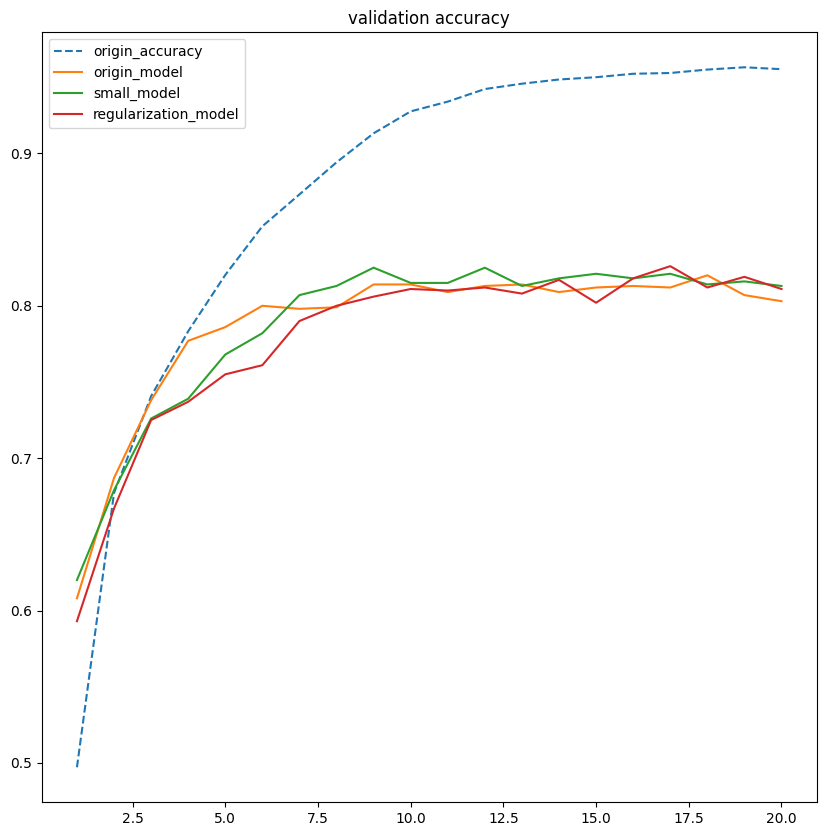

In [71]:
history_dict3 = history3.history
origin_acc = history_dict['accuracy']
origin = history_dict['val_accuracy']
small = history_dict2['val_accuracy']
regular = history_dict3['val_accuracy']


epoch = range(1,len(loss_values)+1)

## Graficando los resultados
fig = plt.figure(figsize=(10,10))
plt.plot(epoch,origin_acc, '--' ,label='origin_accuracy')
plt.plot(epoch,origin, label='origin_model')
plt.plot(epoch,small, label='small_model')
plt.plot(epoch,regular, label='regularization_model')
plt.title('validation accuracy')
plt.legend()
plt.show()

Dropout

In [72]:
model4 = models.Sequential()
model4.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(46, activation='softmax')) # softmax para clasificaciones multilayer

model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history4 = model4.fit(partial_x_val, partial_y_val,
          epochs=20,
          batch_size=512,
          validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 3.1302 - accuracy: 0.3385 - val_loss: 2.1413 - val_accuracy: 0.5430
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 2.1168 - accuracy: 0.5307 - val_loss: 1.6336 - val_accuracy: 0.6090
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.7546 - accuracy: 0.5877 - val_loss: 1.4658 - val_accuracy: 0.6590
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 1.5705 - accuracy: 0.6264 - val_loss: 1.3563 - val_accuracy: 0.6870
Epoch 5/20
16/16 [==============================] - 0s 8ms/step - loss: 1.4455 - accuracy: 0.6587 - val_loss: 1.2757 - val_accuracy: 0.6950
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 1.3361 - accuracy: 0.6872 - val_loss: 1.2195 - val_accuracy: 0.7140
Epoch 7/20
16/16 [==============================] - 0s 8ms/step - loss: 1.2409 - accuracy: 0.6977 - val_loss: 1.1813 - val_accuracy: 0.7180
Epoch 8/20
16/16 [=

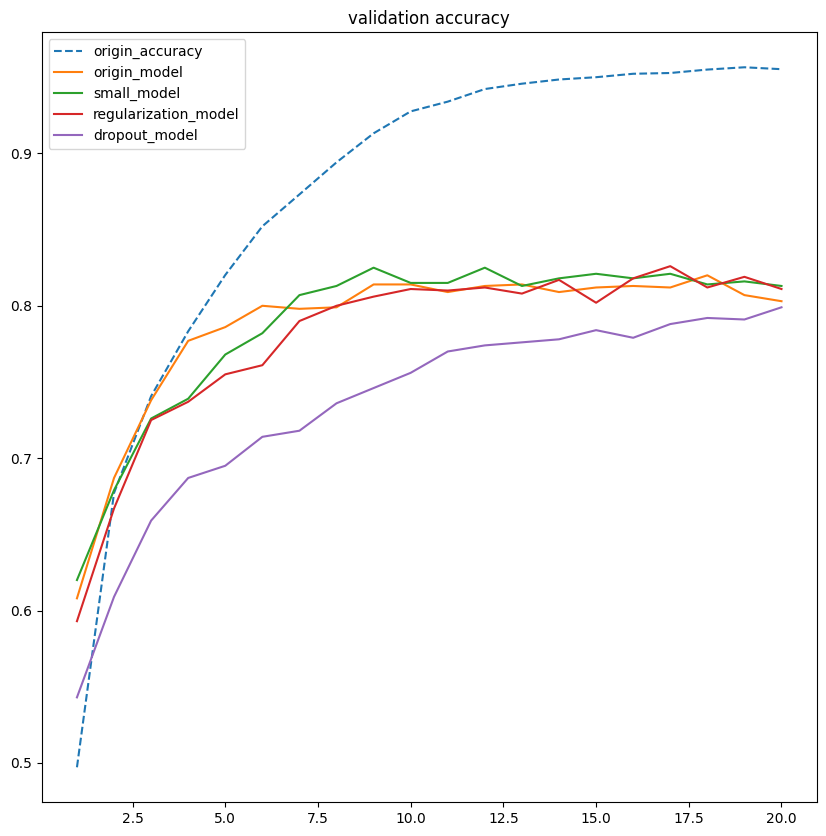

In [73]:
history_dict4 = history4.history
origin_acc = history_dict['accuracy']
origin = history_dict['val_accuracy']
small = history_dict2['val_accuracy']
regular = history_dict3['val_accuracy']
dropout = history_dict4['val_accuracy']


epoch = range(1,len(loss_values)+1)

## Graficando los resultados
fig = plt.figure(figsize=(10,10))
plt.plot(epoch,origin_acc, '--' ,label='origin_accuracy')
plt.plot(epoch,origin, label='origin_model')
plt.plot(epoch,small, label='small_model')
plt.plot(epoch,regular, label='regularization_model')
plt.plot(epoch,dropout, label='dropout_model')
plt.title('validation accuracy')
plt.legend()
plt.show()

Prediction

In [78]:
acurrancy_models = {}
acurrancy_models['origin_model'] = model.evaluate(x_test,y_test)[1]
acurrancy_models['small_model'] = model2.evaluate(x_test,y_test)[1]
acurrancy_models['regularization_model'] = model3.evaluate(x_test,y_test)[1]
acurrancy_models['dropout_model'] = model4.evaluate(x_test,y_test)[1]

acurrancy_models

71/71 [==============================] - 0s 1ms/step - loss: 1.0821 - accuracy: 0.7711


{'origin_model': 0.7894033789634705,
 'small_model': 0.7943009734153748,
 'regularization_model': 0.7920747995376587,
 'dropout_model': 0.771148681640625}